In [1]:
# Kütüphaneleri Import Et
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
from tensorflow import keras
from pandas import ExcelWriter
from pandas import ExcelFile
from tensorflow.keras import datasets, layers, models

In [3]:
#Veriyi İçeri Akter
train_data = pd.read_excel("data/train.xls")
train_data.head()

,ACC_N,ACC_C,ACC_I,RT_N,RT_C,RT_I,GE_N,GE_C,GE_I,GED_N,...,R_N,R_C,R_I,NCI_N,NCI_C,NCI_I,NCR_N,NCR_C,NCR_I,CASE
0,96.666667,96.666667,96.666667,0.719383,0.815559,0.865545,0.312500,0.298611,0.251389,0.150694,...,2.073733,1.228571,1.220078,41.992017,35.393827,28.075872,278.656705,145.620317,136.261987,Control
1,93.333333,96.666667,100.000000,0.800932,0.785466,0.817040,0.371895,0.424524,0.355694,0.166181,...,2.237896,1.986630,1.855125,43.337236,52.245835,43.534520,260.784035,244.493043,227.054361,Control
2,100.000000,100.000000,93.333333,1.155340,1.191243,1.497596,0.212500,0.401944,0.375000,0.138472,...,1.534604,2.062303,4.778761,18.392854,33.741590,23.370782,132.827030,173.121872,297.822358,Control
3,96.666667,83.333333,76.666667,0.875600,0.827616,0.881861,0.302083,0.431806,0.331944,0.092361,...,3.270677,2.292531,1.402582,33.350147,43.478855,28.858378,361.084301,230.836859,121.936807,Control
4,100.000000,100.000000,86.666667,1.086340,1.028857,1.280985,0.297222,0.366528,0.325556,0.202361,...,1.468771,1.713636,1.251468,27.359963,35.624766,22.025881,135.203661,166.557347,84.669698,Control


In [4]:
train_features = train_data.copy()

In [5]:
# Veri Ön İşleme
train_features = train_data.copy()
train_labels = train_features.pop('CASE')
labels=[]
for i in range(len(train_labels)):
    if train_labels[i]=="Control":
        data = [1, 0, 0, 0]
        labels.append(data)
    elif train_labels[i]=="Migraine":
        data = [0, 1, 0, 0]
        labels.append(data)
    elif train_labels[i]=="OCD":
        data = [0, 0, 1, 0]
        labels.append(data)
    elif train_labels[i]=="Schizo":
        data = [0, 0, 0, 1]
        labels.append(data)
len(labels)

76

In [6]:
labels = np.array(labels)
labels

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0,

In [7]:
train_features = np.array(train_features)
train_features

array([[ 96.66666667,  96.66666667,  96.66666667, ..., 278.65670548,
        145.62031686, 136.26198677],
       [ 93.33333333,  96.66666667, 100.        , ..., 260.78403528,
        244.49304267, 227.05436144],
       [100.        , 100.        ,  93.33333333, ..., 132.82703026,
        173.12187201, 297.82235762],
       ...,
       [ 96.66666667, 100.        ,  93.33333333, ...,  61.48224376,
         26.26319397,  29.46968284],
       [ 96.66666667,  96.66666667,  50.        , ...,  63.77320007,
         45.09098421,  10.74684427],
       [100.        , 100.        ,  90.        , ...,  43.44274236,
         30.00044517,  24.12611682]])

In [8]:
test_data = pd.read_excel("data/test.xls")
test_data.head()

,ACC_N,ACC_C,ACC_I,RT_N,RT_C,RT_I,GE_N,GE_C,GE_I,GED_N,...,R_N,R_C,R_I,NCI_N,NCI_C,NCI_I,NCR_N,NCR_C,NCR_I,CASE
0,96.666667,96.666667,93.333333,0.893475,0.895562,1.057679,0.351667,0.304861,0.309722,0.144940,...,2.426283,1.870359,1.403945,38.047449,32.906605,27.330995,262.503960,201.885928,123.889147,Control
1,76.666667,96.666667,56.666667,1.642448,1.502569,2.332329,0.393194,0.248611,0.277083,0.224931,...,1.748070,1.016179,1.014751,18.353647,15.994213,6.732063,81.596948,65.375152,24.654555,Migraine
2,100.000000,96.666667,100.000000,1.219270,1.337138,1.515313,0.259514,0.276111,0.281042,0.227083,...,1.142813,1.456410,1.045736,21.284366,19.961098,18.546769,93.729318,105.289306,69.011234,OCD
3,100.000000,70.000000,80.000000,1.798820,2.050367,2.162617,0.210556,0.177222,0.152083,0.216667,...,0.971795,1.149550,0.598361,11.705204,6.050408,5.625901,54.024020,39.245892,22.134691,Schizo


In [9]:
test_features = test_data.copy()

In [10]:
test_labels = test_features.pop('CASE')
testing_labels=[]
for i in range(len(test_labels)):
    if test_labels[i]=="Control":
        data = [1, 0, 0, 0]
        testing_labels.append(data)
    elif test_labels[i]=="Migraine":
        data = [0, 1, 0, 0]
        testing_labels.append(data)
    elif test_labels[i]=="OCD":
        data = [0, 0, 1, 0]
        testing_labels.append(data)
    elif test_labels[i]=="Schizo":
        data = [0, 0, 0, 1]
        testing_labels.append(data)
len(testing_labels)

4

In [11]:
testing_labels = np.array(testing_labels)
testing_labels

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [12]:
test_features = np.array(test_features)
test_features

array([[9.66666667e+01, 9.66666667e+01, 9.33333333e+01, 8.93475000e-01,
        8.95562069e-01, 1.05767857e+00, 3.51666667e-01, 3.04861111e-01,
        3.09722222e-01, 1.44940476e-01, 1.62996032e-01, 2.20608466e-01,
        2.42628337e+00, 1.87035910e+00, 1.40394532e+00, 3.80474489e+01,
        3.29066052e+01, 2.73309947e+01, 2.62503960e+02, 2.01885928e+02,
        1.23889147e+02],
       [7.66666667e+01, 9.66666667e+01, 5.66666667e+01, 1.64244783e+00,
        1.50256897e+00, 2.33232941e+00, 3.93194444e-01, 2.48611111e-01,
        2.77083333e-01, 2.24930556e-01, 2.44652778e-01, 2.73055556e-01,
        1.74807039e+00, 1.01617939e+00, 1.01475076e+00, 1.83536469e+01,
        1.59942126e+01, 6.73206315e+00, 8.15969481e+01, 6.53751521e+01,
        2.46545548e+01],
       [1.00000000e+02, 9.66666667e+01, 1.00000000e+02, 1.21927000e+00,
        1.33713793e+00, 1.51531333e+00, 2.59513889e-01, 2.76111111e-01,
        2.81041667e-01, 2.27083333e-01, 1.89583333e-01, 2.68750000e-01,
        1.1428

In [13]:
#Model Tanımı
input_shape= (21)#Bu değişemez
epochs=240
batch_size=64
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(4, activation="softmax")
    ]
)
model.summary()


# Eğitiim
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_features, labels, batch_size=batch_size, epochs=epochs)

# Kaydet
model.save("model/the_kid.h5")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 176       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 1

76/76 [==============================] - 0s 69us/sample - loss: 0.7145 - accuracy: 0.6842
Epoch 61/240
76/76 [==============================] - 0s 175us/sample - loss: 0.7947 - accuracy: 0.6447
Epoch 62/240
76/76 [==============================] - 0s 185us/sample - loss: 0.7741 - accuracy: 0.6184
Epoch 63/240
76/76 [==============================] - 0s 138us/sample - loss: 0.8058 - accuracy: 0.6184
Epoch 64/240
76/76 [==============================] - 0s 323us/sample - loss: 0.7854 - accuracy: 0.6447
Epoch 65/240
76/76 [==============================] - 0s 150us/sample - loss: 0.6562 - accuracy: 0.6447
Epoch 66/240
76/76 [==============================] - 0s 150us/sample - loss: 0.8399 - accuracy: 0.6316
Epoch 67/240
76/76 [==============================] - 0s 191us/sample - loss: 0.8376 - accuracy: 0.6053
Epoch 68/240
76/76 [==============================] - 0s 123us/sample - loss: 0.6760 - accuracy: 0.6711
Epoch 69/240
76/76 [==============================] - 0s 164us/sample - loss: 

76/76 [==============================] - 0s 201us/sample - loss: 0.5097 - accuracy: 0.8026
Epoch 139/240
76/76 [==============================] - 0s 181us/sample - loss: 0.4617 - accuracy: 0.8158
Epoch 140/240
76/76 [==============================] - 0s 124us/sample - loss: 0.4668 - accuracy: 0.8289
Epoch 141/240
76/76 [==============================] - 0s 107us/sample - loss: 0.5345 - accuracy: 0.7895
Epoch 142/240
76/76 [==============================] - 0s 140us/sample - loss: 0.4945 - accuracy: 0.8421
Epoch 143/240
76/76 [==============================] - 0s 126us/sample - loss: 0.5767 - accuracy: 0.7500
Epoch 144/240
76/76 [==============================] - 0s 89us/sample - loss: 0.4897 - accuracy: 0.8158
Epoch 145/240
76/76 [==============================] - 0s 85us/sample - loss: 0.5826 - accuracy: 0.7632
Epoch 146/240
76/76 [==============================] - 0s 175us/sample - loss: 0.5150 - accuracy: 0.8289
Epoch 147/240
76/76 [==============================] - 0s 130us/sample 

76/76 [==============================] - 0s 138us/sample - loss: 0.4538 - accuracy: 0.7763
Epoch 217/240
76/76 [==============================] - 0s 86us/sample - loss: 0.4688 - accuracy: 0.8026
Epoch 218/240
76/76 [==============================] - 0s 176us/sample - loss: 0.5343 - accuracy: 0.8158
Epoch 219/240
76/76 [==============================] - 0s 289us/sample - loss: 0.4670 - accuracy: 0.8158
Epoch 220/240
76/76 [==============================] - 0s 147us/sample - loss: 0.4550 - accuracy: 0.8026
Epoch 221/240
76/76 [==============================] - 0s 184us/sample - loss: 0.3966 - accuracy: 0.8816
Epoch 222/240
76/76 [==============================] - 0s 120us/sample - loss: 0.4490 - accuracy: 0.8026
Epoch 223/240
76/76 [==============================] - 0s 173us/sample - loss: 0.4185 - accuracy: 0.8289
Epoch 224/240
76/76 [==============================] - 0s 269us/sample - loss: 0.4321 - accuracy: 0.8553
Epoch 225/240
76/76 [==============================] - 0s 106us/sample

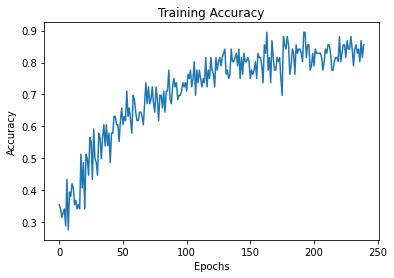

In [19]:
acc = history.history['accuracy']
plt.plot(acc)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [20]:
prediction=model.predict(test_features)

In [21]:
prediction

array([[1.0000000e+00, 2.4434706e-11, 1.7836657e-11, 7.8600982e-13],
       [9.3773454e-03, 5.7889432e-01, 1.9497071e-01, 2.1675766e-01],
       [2.6038261e-02, 3.5749033e-02, 8.3283865e-01, 1.0537403e-01],
       [1.0599514e-03, 1.2968262e-01, 2.0894960e-01, 6.6030782e-01]],
      dtype=float32)

In [22]:
testing_labels

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])